## `arcgis.mapping` module
The `arcgis.mapping` module contains classes and functions to represent and interact with web maps, scenes, and certain layer types such as map image and vector tiles. In this page we will observe how to visualize maps, scenes and layers using the map widget in Jupyter notebook environment.

Contents of this page:
 - [Using the map widget](#Using-the-map-widget)
 - [Setting the map properties](#Setting-the-map-properties)
  - [Zoom level](#Zoom-level)
  - [Map center](#Map-center)
  - [Basemaps](#Basemaps)
  - [3D Mode](#3D-Mode)
 - [Adding layers to the map](#Adding-layers-to-the-map)
  - [Adding Item objects to the map](#Adding-Item-objects-to-the-map)
  - [Adding layer objects to the map](#Adding-layer-objects-to-the-map)
  - [Adding Imagery layers](#Adding-imagery-layers)
 - [Listing the layers added to the map](#Listing-the-layers-added-to-the-map)
 - [Removing layers from the map](#Removing-layers-from-the-map)
 - [Drawing graphics on the map](#Drawing-graphics-on-the-map)
 - [Clearing the drawn graphics](#Clearing-the-drawn-graphics)
 - [Saving the map as a web map](#Saving-the-map-as-a-web-map)

## Using the map widget
The `GIS` object includes a map widget for displaying geographic locations, visualizing GIS content, as well as the results of your analysis. To use the map widget, call `gis.map()` and assign it to a variable, that you can then query to bring up the widget in the notebook:

In [1]:
import arcgis
from arcgis.gis import GIS
# Create a GIS object, as an anonymous user for this example
gis = GIS()

In [2]:
# Create a map widget
map1 = gis.map('Paris') # Passing a place name to the constructor
                        # will initialize the extent of the map.
map1

MapView(layout=Layout(height='400px', width='100%'))

![paris map](http://esri.github.io/arcgis-python-api/notebooks/nbimages/02_MapWidget_Basemaps_01.PNG)

## Setting the map properties
### Zoom level
The map widget has several properties that you can query and set, such as its zoom level, basemap, height, etc:

In [3]:
map1.zoom

2.0

Assigning a value to the `zoom` property will update the widget.

In [4]:
map1.zoom = 10

You can also set `rotation` in 2D mode. This can also be achieved by right-clicking and dragging on the map.

In [5]:
map1.rotation = 45

Your notebook can have as many of these widgets as you wish. Let us create another map widget and modify some of its properties.
### Map center
The center property reveals the coordinates of the center of the map.

In [6]:
map2 = gis.map() # creating a map object with default parameters
map2

MapView(layout=Layout(height='400px', width='100%'))

In [7]:
map2.center

{'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'x': 0,
 'y': 1.30385160446167e-08}

If you know the latitude and longitude of your place of interest, you can assign it to the center property.

In [8]:
map2.center = [34,-118] # here we are setting the map's center to Los Angeles

You can use geocoding to get the coordinates of place names and drive the widget. Geocoding converts place names to coordinates and can be used using `arcgis.geocoding.geocode()` function.

Let us geocode `Times Square, NY` and set the map's extent to the geocoded location's extent.

In [10]:
location = arcgis.geocoding.geocode('Times Square, NY', max_locations=1)[0]
map2.extent = location['extent']

## Basemaps
Basemap are layers on your map over which all other operational layers that you add are displayed. Basemaps typically span the full extent of the world and provide context to your GIS layers. It helps viewers understand where each feature is located as they pan and zoom to various extents.

Your map can have a number of different basemaps. To see what basemaps are included with the widget, query the `basemaps` property

In [11]:
map3 = gis.map()
map3.basemaps

['dark-gray',
 'dark-gray-vector',
 'gray',
 'gray-vector',
 'hybrid',
 'national-geographic',
 'oceans',
 'osm',
 'satellite',
 'streets',
 'streets-navigation-vector',
 'streets-night-vector',
 'streets-relief-vector',
 'streets-vector',
 'terrain',
 'topo',
 'topo-vector']

You can assign any one of the supported basemaps to the `basemap` property to change the basemap. For instance, you can change the basemap to the dark gray vector basemap as below:

In [12]:
map3.basemap = 'dark-gray-vector'
map3

MapView(basemap='dark-gray-vector', layout=Layout(height='400px', width='100%'))

Query the `basemap` property to find what the current basemap is

In [13]:
map3.basemap

'dark-gray-vector'

Let us animate a new map widget by cycling through basemaps and assigning it to the basemap property of the map widget.

In [14]:
map4 = gis.map('New York City, NY')
map4

MapView(layout=Layout(height='400px', width='100%'))

![basemap animation](http://esri.github.io/arcgis-python-api/notebooks/nbimages/02_MapWidget_Basemaps_03.gif)

In [15]:
import time

for basemap in map4.basemaps:
    map4.basemap = basemap
    time.sleep(3)

# 3D Mode

The map widget also includes support for 3D mode! You can specify the 'mode' parameter through `gis.map(mode="foo")`, or by setting the `mode` property of any instatiated map object. Run the below cell:

In [38]:
from arcgis.gis import GIS
gis = GIS()
usa_map = gis.map('USA', zoomlevel=4, mode="3D") #Notice `mode="3D"`
usa_map

MapView(layout=Layout(height='400px', width='100%'), mode='3D', zoom=4.0)

<img src=" 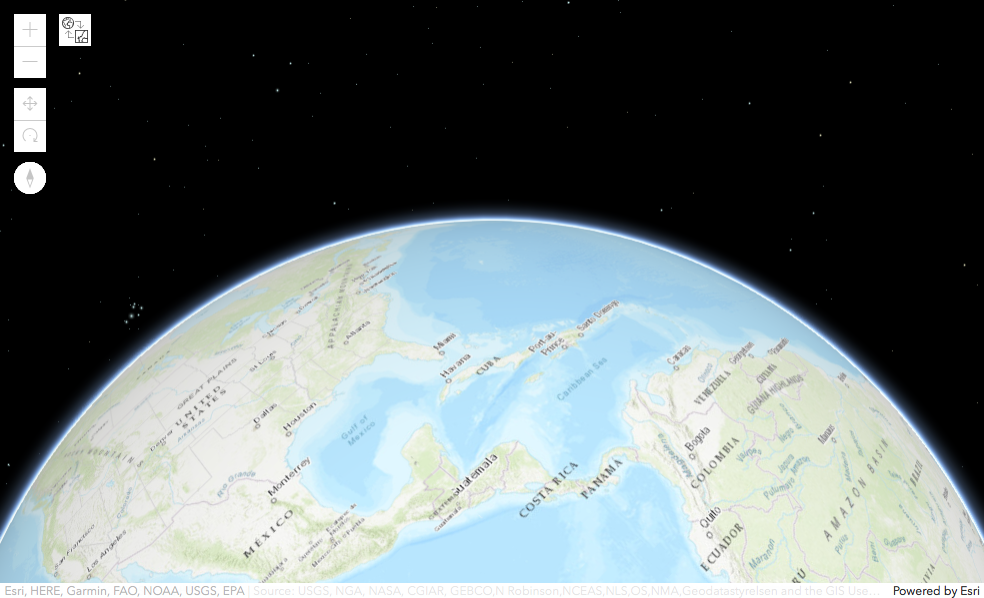">

Just like 2D mode, you can pan by click-and-drag with the left mouse button, and you can zoom with the mouse wheel. In 3D mode, click-and-drag with the right mouse button modifies the `tilt` field and the `heading` field. 

`tilt` is a number from 0-90: 0 represents a top-down 'birds-eye' view, while 90 represents being completely parallel to the ground, facing the horizon. 

It's important to note that 2D mode uses `rotation` to specify the number of angles clockwise from due north, while 3D mode uses `heading` to specify the number of degrees counterclockwise of due north. See the API reference for more information.

Try running the below two cells, and replace them with your own values!

In [39]:
usa_map.tilt = 45

In [ ]:
usa_map.heading = 45

Read more about 3D mode by reading the [advanced map widget useage](../advanced-map-widget-useage) guide page, or by reading the [API reference](https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.widgets.html#mapview).

## Adding layers to the map
An important functionality of the map widget is its ability to add and render GIS layers. To a layer call the `add_layer()` method and pass the layer object as an argument.

In [21]:
# Log into to GIS as we will save the widget as a web map later
gis = GIS("https://www.arcgis.com", "arcgis_python", "P@ssword123")
usa_map = gis.map('USA', zoomlevel=4)  # you can specify the zoom level when creating a map
usa_map

MapView(layout=Layout(height='400px', width='100%'), zoom=4.0)

<img src=" 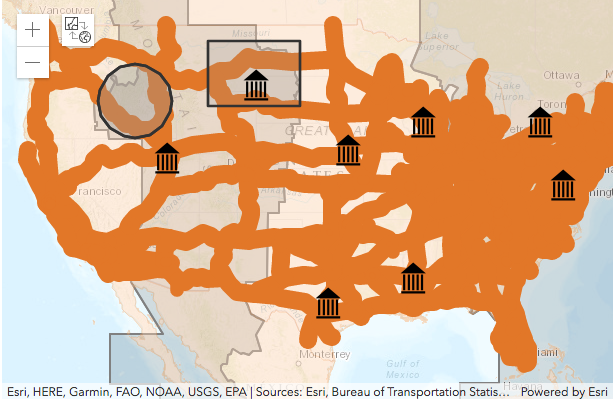">

Next, search from some layers to add to the map

In [22]:
flayer_search_result = gis.content.search("owner:esri","Feature Layer", outside_org=True)
flayer_search_result

[<Item title:"USA Block Groups" type:Feature Layer Collection owner:esri>,
 <Item title:"USA Detailed Streams" type:Feature Layer Collection owner:esri>,
 <Item title:"USA Tracts" type:Feature Layer Collection owner:esri>,
 <Item title:"2018 USA Traffic Counts" type:Feature Layer Collection owner:esri>,
 <Item title:"World Time Zones" type:Feature Layer Collection owner:esri>,
 <Item title:"USA Core Based Statistical Area" type:Feature Layer Collection owner:esri>,
 <Item title:"World Regions" type:Feature Layer Collection owner:esri>,
 <Item title:"World Continents" type:Feature Layer Collection owner:esri>,
 <Item title:"USA Freeway System" type:Feature Layer Collection owner:esri>,
 <Item title:"World Countries" type:Feature Layer Collection owner:esri>]

### Adding `Item` objects to the map
You can add `Item` objects to a map by passing it to the `add_layer()` method.

In [23]:
world_timezones_item = flayer_search_result[4]
usa_map.add_layer(world_timezones_item)

In [25]:
world_countries_item = flayer_search_result[-1]
world_countries_layer = world_countries_item.layers[0]
world_countries_layer

<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/World_Countries/FeatureServer/0">

In [26]:
usa_map.add_layer(world_countries_layer, options={'opacity':0.4})

### Adding layers with custom symbology

You can add a number of different layer objects such as `FeatureLayer`, `FeatureCollection`, `ImageryLayer`, `MapImageLayer` to the map. While calling the `add_layer()` method, you can specify a set of renderer instructions as a dictionary to the `options` parameter. The previous cell shows how you can set the transparency for a layer. The `opacity` value ranges from `0 - 1`, with `0` being fully transparent and `1` being fully opaque.

You can make use of the **"smart mapping"** capability to render feature layers with symbology that varies based on an attribute field of that layer. The cell below adds the 'USA Freeway System' layer to the map and changes the width of the line segments based on the length of the freeway.

In [27]:
freeway_feature_layer = flayer_search_result[-2].layers[0]
usa_map.add_layer(freeway_feature_layer, {"renderer":"ClassedSizeRenderer", "field_name": "DIST_MILES"})

Refer to the guide on [smart mapping](../smart-mapping/) to learn more about this capability.

### Adding imagery layers
Similar to `FeatureLayer`s, you can also add `ImageryLayer`s and imagery layer items. You can also specify either a built-in raster function or a custom one for rendering.

In [29]:
landsat_item = GIS().content.search("Landsat 8 Views", "Imagery Layer", max_items=2)[0]
landsat_item

<Item title:"Pansharpened Landsat" type:Imagery Layer owner:esri>

In [30]:
usa_map.add_layer(landsat_item)

## Listing the layers added to the map
You can list the layers added to be map using the `layers` property.

In [31]:
usa_map.layers

[{'type': 'FeatureLayer',
  'url': 'https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/World_Time_Zones/FeatureServer/0?token=_M4Vg2lmNAFmJtmzi_jqtVFDsRK5kAPOOPpgoalkq5oR14r6wTv5IP0gplo81revxb7t0DbDh3GHCNU8Coihs5jeLvIYFGBZI0ZIW_KdZ3no1fzefPc1fG8GHIzFhsc9mTxL0cDr9e0YVMChz86M_E7_gFvpnWiP_rQGmMhsZmo.',
  'options': {},
  '_hashFromPython': '274241533'},
 {'type': 'FeatureLayer',
  'url': 'https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/World_Countries/FeatureServer/0?token=EVOuXYldA35W1h5Zqdzhi_kvBjc94qxXtVR6sOY9OOVmsd9L16FEjIeKv-TnpmJCAEl_Ej_MOB1VdcnaVjSMAYciG4VwgfS4BzQATpC89Rm8rmGKEaDW6dV0KEC8VRPynMF3mDdU9XeSvJ_fQtoMigWKWYUWlost6DOhgRd_AXk.',
  'options': {'opacity': 0.4},
  '_hashFromPython': '-9223372036580569628'},
 {'type': 'FeatureLayer',
  'url': 'https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Freeway_System/FeatureServer/1?token=eN8zkcL7j3pAMmAmFB91PcbwEMQrNq_AAay-U4cuRTq6lwmzrqPeNzXJ1IHUAXYPq-KsuBbboH0z9QFgLImkqGSgjE9BE8SU2

## Removing layers from the map
To remove one or more layers, call the `remove_layers()` method and pass a list of layers that you want removed. To get a list of valid layers that can be removed, call the `layers` property as shown in the previous cell.

The code below shows how to remove the USA freeways layer

In [32]:
usa_map.remove_layers(layers=[landsat_item])

True

To remove all layers, call the `remove_layers()` method with any parameters.

## Drawing graphics on the map
You can draw or sketch graphics on the map using the `draw()` method. For instance, you can draw and annotate rectangles, ellipses, arrow marks etc. as shown below:

In [33]:
usa_map.draw('rectangle')

Now scroll to the map and draw a rectangle.

In [34]:
usa_map.draw('circle')

Scoll back to the map again and place an 'up arrow' below Los Angeles. Refer to the API reference documentation for [draw](http://esri.github.io/arcgis-python-api/apidoc/html/arcgis.widgets.html#arcgis.widgets.MapView.draw) to get the list of supported shapes that you can sketch on the map.

### Drawing `FeatureSet` objects on the map
In addition to sketches, you can send `FeatureSet` objects to the `draw()` method. This capability comes in handy as you can get a `FeatureSet` object through various different operations using the Python API. For instance, you can get results of a `geocoding` operation as a `FeatureSet`, results of a `query()` operation on a `FeatureLayer` as a `FeatureSet` that can you visualize on the map using the `draw()` method.

The snippet below geocodes the locations of a few capitol buildings in the USA.

In [35]:
from arcgis.geocoding import geocode
usa_extent = geocode('USA')[0]['extent']
usa_extent

{'xmin': -146.08761918999994,
 'ymin': -7.2742968439999345,
 'xmax': -52.74161918999994,
 'ymax': 84.9}

In [36]:
usa_capitols_fset = geocode('Capitol', search_extent=usa_extent, max_locations=10, as_featureset=True)
usa_capitols_fset

<FeatureSet> 10 features

### Drawing with custom symbols
While drawing a graphic, you can specify a custom symbol. Users of the Python API can make use of a custom [symbol selector web app](https://esri.github.io/arcgis-python-api/tools/symbol.html) and pick a symbol for point layers. For instance, you can pick a business marker symbol for the capitol buildings as shown below:

In [37]:
capitol_symbol = {"angle":0,"xoffset":0,"yoffset":0,"type":"picture-marker",
                  "url":"http://static.arcgis.com/images/Symbols/PeoplePlaces/esriBusinessMarker_57.png",
                  "contentType":"image/png","width":24,"height":24}

usa_map.draw(usa_capitols_fset, symbol=capitol_symbol)

## Clearing the drawn graphics
You can clear all drawn graphics from the map by calling the `clear_graphics()` method.

In [ ]:
pittsburgh_map.clear_graphics()

## Saving the map as a web map
Starting with the Python API version `1.3`, you can save the map widget as a web map in your GIS. This process persistes all the basemaps, layers added with or without your custom symbology including smart mapping, pop-ups, extent, graphics drawn with or without custom symbols as layers in your web map.

To save the map, call the `save()` method. This method creates and returns a new Web Map `Item` object. As parameters, you can specify all valid Item properties as shown below:

<Item title:"USA time zones and capitols" type:Web Map owner:arcgis_python>
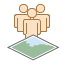

In [38]:
webmap_properties = {'title':'USA time zones and capitols',
                    'snippet': 'Jupyter notebook widget saved as a web map',
                    'tags':['automation', 'python']}

webmap_item = usa_map.save(webmap_properties, thumbnail='./webmap_thumbnail.png', folder='webmaps')
webmap_item

You can use this web map back in the notebook, or in any ArcGIS app capabale of rendering web maps. To learn how you can use this read this web map using the Python API, refer to the guide titled [working with web maps and scenes](../working-with-web-maps-and-web-scenes/)